In [6]:
import torch
import einops
from torchtyping import TensorType

In [9]:
# Generate random 3D data
n_samples = 1000
data: TensorType[1000, 3]  = torch.randn(n_samples, 3)  # Creates 1000 samples of 3D data points

# Add some correlation to make it more interesting
data[:, 1] = data[:, 1] + 0.5 * data[:, 0]  # Add correlation between first two dimensions
data[:, 2] = data[:, 2] - 0.8 * data[:, 0] + 0.3 * data[:, 1]  # Add correlation with third dimension

mu = einops.reduce(data, "b d -> d", "mean")

print(f"Data shape: {data.shape}")
print(f"Mean Before shift: {mu}")

# Shift all data by mean
data -= mu

mu = einops.reduce(data, "b d -> d", "mean")
print(f"Mean After shift: {mu}")

Data shape: torch.Size([1000, 3])
Mean Before shift: tensor([-0.0362, -0.0287,  0.0332])
Mean After shift: tensor([-6.6757e-09,  1.2398e-08, -1.3351e-08])


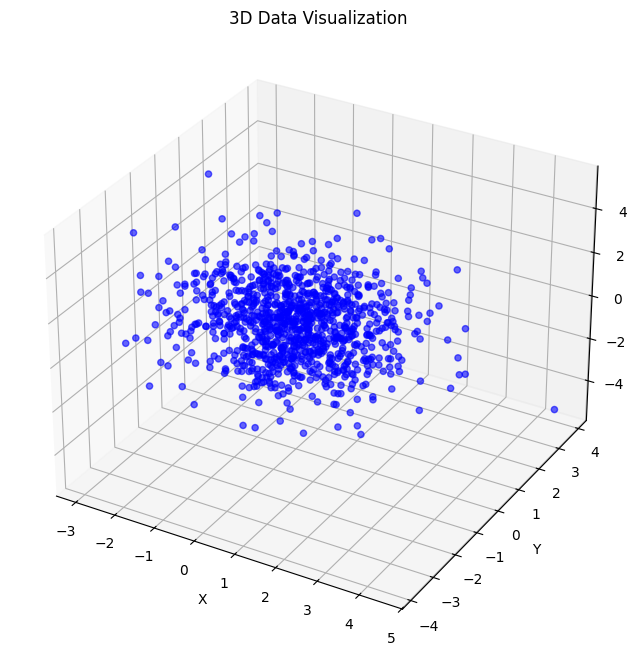

In [10]:
# Visualize the 3D data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(data[:, 0].numpy(), 
          data[:, 1].numpy(), 
          data[:, 2].numpy(),
          c='b', marker='o', alpha=0.6)

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data Visualization')

plt.show()


In [22]:
covars = data.unsqueeze(-1) @ data.unsqueeze(1)
einops.reduce(covars, "batch dim1 dim2 -> dim1 dim2", "mean")

tensor([[ 1.0142,  0.5048, -0.6622],
        [ 0.5048,  1.1707, -0.0477],
        [-0.6622, -0.0477,  1.5271]])

Eigenvalues: tensor([2.1065, 1.2477, 0.3578])

Eigenvectors (columns):
 tensor([[ 0.5996, -0.1764,  0.7806],
        [ 0.3598, -0.8118, -0.4599],
        [-0.7148, -0.5566,  0.4233]])

Explained variance ratio: tensor([0.5675, 0.3361, 0.0964])


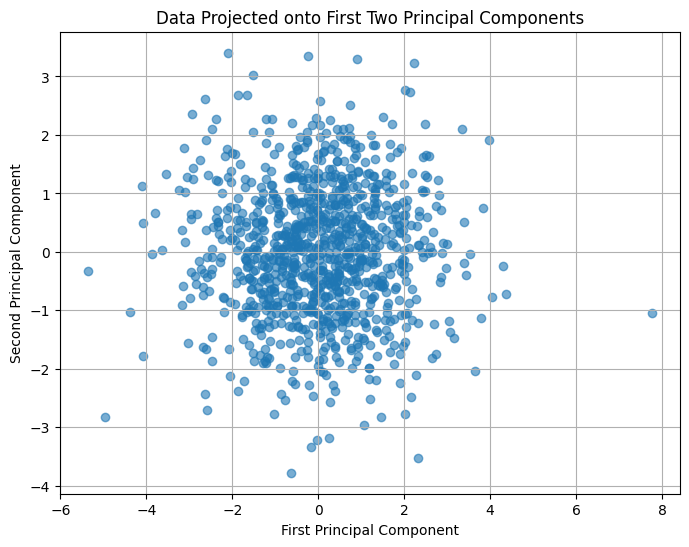

In [23]:
# Calculate covariance matrix
cov_matrix = einops.reduce(data.unsqueeze(-1) @ data.unsqueeze(1), "batch dim1 dim2 -> dim1 dim2", "mean")

# Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto principal components
principal_components = data @ eigenvectors

print("Eigenvalues:", eigenvalues)
print("\nEigenvectors (columns):\n", eigenvectors)
print("\nExplained variance ratio:", eigenvalues / torch.sum(eigenvalues))

# Visualize first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0].numpy(), 
           principal_components[:, 1].numpy(),
           alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Projected onto First Two Principal Components')
plt.grid(True)
plt.show()
